In [12]:
import numpy as np

In [1]:
import random

def getD(G): 
    V = G.vertices()
    D = [None] + [(v,w,i) for v in V for w in G.neighbors(v) for i in [0,1]]
    return D
  
def twisted_faces(G):
    """
      We assume G is cubic for start.
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        for i in range(3):
            Rlist.append((D.index((v,N[i],1)),D.index((v,N[(i+1)%3],0))))
            
    R = Permutation(Rlist)
    
    Llist = []
    E = G.edges(labels=None)
    twists = [random.randint(0,1) for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)

        
    return R*L, R, L, D

In [2]:
def twisted_faces2(G, do_twist=True):
    """
      Now for general G. 
    """ 
    V = G.vertices()
    D = getD(G)
    Rlist = []
    for v in V:
        N = G.neighbors(v)
        d = len(N)
        random.shuffle(N)
        for x,y in zip(N,N[1:]+[N[0]]):
            Rlist.append((D.index((v,x,1)),D.index((v,y,0))))
            
    R = Permutation(Rlist)
    
    Llist = []
    E = G.edges(labels=None)
    if do_twist:
        twists = [random.randint(0,1) for _ in E]
    else:
        twists = [1 for _ in E]
    for (u,v),t in zip(E,twists):
        Llist.append((D.index((u,v,0)),D.index((v,u,t))))
        Llist.append((D.index((u,v,1)),D.index((v,u,(t+1)%2))))

        #Llist.append(((u,v,1),(v,u,(t+1)%2)))
        #Llist.append(None)
    L = Permutation(Llist)

        
    return R*L #, R, L, D

In [3]:
def sample_number_of_twisted_faces(G,samples=10,do_twist=True):
    return [len(twisted_faces2(G,do_twist=do_twist).cycle_type())/2 for _ in range(samples)]

def exp_size(L):
    return sum(L)/len(L)

In [4]:
def equal(e,f):
    return set(e[0:2])==set(f[0:2])

In [5]:
equal((1,0,1),(0,1,0))

True

In [6]:
def count_bad(G,do_twist=True):
    D = getD(G)
    F = twisted_faces2(G,do_twist=do_twist)
    bad = 0
    for face in F.cycle_tuples():
        edges = [tuple(sorted(D[x][:2])) for x in face]
        bad += len(edges) - len(set(edges))
        
    return bad/2
    
def sample_number_of_bad_edges(G,do_twist=True,samples=10):
    return [count_bad(G,do_twist=do_twist) for _ in range(samples)]


In [170]:
count_bad(K4)

6

In [95]:
def check_tw_faces(G):
    F,R,L,D = twisted_faces2(G)
    print(list(zip(D,range(100))))
    C = F.cycle_tuples()
    m = G.num_edges()
    assert(len(D) == 4*m+1)
    U = reduce(lambda x,y: x.union(y), [set(x) for x in C], set([]))
    assert(len(U) == 4*m)
    print(R.cycle_tuples())
    for vert in R.cycle_tuples():
        for x in vert:
            print(D[x])
        print('--')
    print('\n ===== \n')

    print(L.cycle_tuples())
    for edge in L.cycle_tuples():
        for x in edge:
            print(D[x])
        print('--')            

    print('\n ===== \n')
    print(F.cycle_tuples())
    for face in C:
        for d in face:
            print(D[d])

In [65]:
K4 = graphs.CompleteGraph(4)

In [68]:
check_tw_faces(K4)

[(1, 6), (2, 3), (4, 5), (7, 12), (8, 9), (10, 11), (13, 18), (14, 15), (16, 17), (19, 24), (20, 21), (22, 23)]
(0, 1, 0)
(0, 3, 1)
--
(0, 1, 1)
(0, 2, 0)
--
(0, 2, 1)
(0, 3, 0)
--
(1, 0, 0)
(1, 3, 1)
--
(1, 0, 1)
(1, 2, 0)
--
(1, 2, 1)
(1, 3, 0)
--
(2, 0, 0)
(2, 3, 1)
--
(2, 0, 1)
(2, 1, 0)
--
(2, 1, 1)
(2, 3, 0)
--
(3, 0, 0)
(3, 2, 1)
--
(3, 0, 1)
(3, 1, 0)
--
(3, 1, 1)
(3, 2, 0)
--

 ===== 

[(1, 7), (2, 8), (3, 14), (4, 13), (5, 20), (6, 19), (9, 15), (10, 16), (11, 22), (12, 21), (17, 23), (18, 24)]
(0, 1, 0)
(1, 0, 0)
--
(0, 1, 1)
(1, 0, 1)
--
(0, 2, 0)
(2, 0, 1)
--
(0, 2, 1)
(2, 0, 0)
--
(0, 3, 0)
(3, 0, 1)
--
(0, 3, 1)
(3, 0, 0)
--
(1, 2, 0)
(2, 1, 0)
--
(1, 2, 1)
(2, 1, 1)
--
(1, 3, 0)
(3, 1, 1)
--
(1, 3, 1)
(3, 1, 0)
--
(2, 3, 0)
(3, 2, 0)
--
(2, 3, 1)
(3, 2, 1)
--

 ===== 

[(1, 19, 18, 4, 20, 12), (2, 14, 9), (3, 8, 15), (5, 13, 24, 6, 7, 21), (10, 22, 17), (11, 16, 23)]
(0, 1, 0)
(3, 0, 0)
(2, 3, 1)
(0, 2, 1)
(3, 0, 1)
(1, 3, 1)
(0, 1, 1)
(2, 0, 1)
(1, 2, 0)
(0, 2, 0)
(1, 

In [9]:
F,D = twisted_faces(K4)

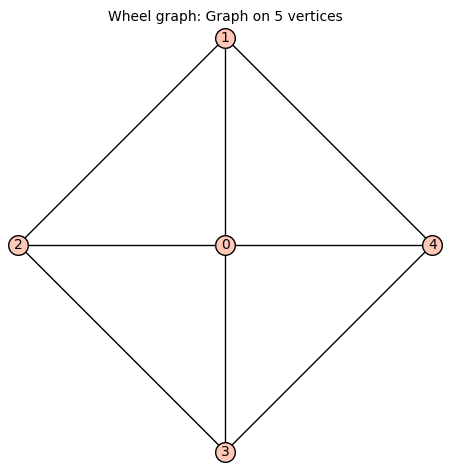

In [90]:
W4 = graphs.WheelGraph(5); W4

In [97]:
check_tw_faces(W4)

[(None, 0), ((0, 1, 0), 1), ((0, 1, 1), 2), ((0, 2, 0), 3), ((0, 2, 1), 4), ((0, 3, 0), 5), ((0, 3, 1), 6), ((0, 4, 0), 7), ((0, 4, 1), 8), ((1, 2, 0), 9), ((1, 2, 1), 10), ((1, 4, 0), 11), ((1, 4, 1), 12), ((1, 0, 0), 13), ((1, 0, 1), 14), ((2, 1, 0), 15), ((2, 1, 1), 16), ((2, 3, 0), 17), ((2, 3, 1), 18), ((2, 0, 0), 19), ((2, 0, 1), 20), ((3, 2, 0), 21), ((3, 2, 1), 22), ((3, 4, 0), 23), ((3, 4, 1), 24), ((3, 0, 0), 25), ((3, 0, 1), 26), ((4, 1, 0), 27), ((4, 1, 1), 28), ((4, 3, 0), 29), ((4, 3, 1), 30), ((4, 0, 0), 31), ((4, 0, 1), 32)]
[(1, 8), (2, 5), (3, 6), (4, 7), (9, 12), (10, 13), (11, 14), (15, 20), (16, 17), (18, 19), (21, 26), (22, 23), (24, 25), (27, 32), (28, 29), (30, 31)]
(0, 1, 0)
(0, 4, 1)
--
(0, 1, 1)
(0, 3, 0)
--
(0, 2, 0)
(0, 3, 1)
--
(0, 2, 1)
(0, 4, 0)
--
(1, 2, 0)
(1, 4, 1)
--
(1, 2, 1)
(1, 0, 0)
--
(1, 4, 0)
(1, 0, 1)
--
(2, 1, 0)
(2, 0, 1)
--
(2, 1, 1)
(2, 3, 0)
--
(2, 3, 1)
(2, 0, 0)
--
(3, 2, 0)
(3, 0, 1)
--
(3, 2, 1)
(3, 4, 0)
--
(3, 4, 1)
(3, 0, 0)
--
(4

In [80]:
twisted_faces2(W4)

([17, 23, 24, 12, 11, 18, 1, 19, 13, 2, 20, 14, 22, 4, 3, 8, 7, 21, 6, 15, 10, 5, 16, 9],
 [4, 5, 6, 1, 2, 3, 12, 9, 8, 11, 10, 7, 16, 17, 18, 13, 14, 15, 24, 21, 20, 23, 22, 19],
 [12, 11, 18, 17, 23, 24, 14, 13, 19, 20, 2, 1, 8, 7, 21, 22, 4, 3, 9, 10, 15, 16, 5, 6],
 [None,
  (0, 1, 0),
  (0, 1, 1),
  (0, 2, 0),
  (0, 2, 1),
  (0, 3, 0),
  (0, 3, 1),
  (1, 2, 0),
  (1, 2, 1),
  (1, 3, 0),
  (1, 3, 1),
  (1, 0, 0),
  (1, 0, 1),
  (2, 1, 0),
  (2, 1, 1),
  (2, 3, 0),
  (2, 3, 1),
  (2, 0, 0),
  (2, 0, 1),
  (3, 1, 0),
  (3, 1, 1),
  (3, 2, 0),
  (3, 2, 1),
  (3, 0, 0),
  (3, 0, 1)])

In [22]:
F = twisted_faces2(K33)

In [27]:
F.cycle_tuples()

[(1, 32, 12, 22, 14, 35, 11, 28, 15, 36, 5, 26, 9, 21),
 (2, 25, 16, 24),
 (3, 19, 13, 30),
 (4, 31, 18, 29, 10, 34, 17, 23, 7, 33, 6, 20, 8, 27)]

In [21]:
K33 = graphs.CompleteBipartiteGraph(3,3)

In [99]:
Pt = graphs.PetersenGraph()

In [104]:
L = sample_number_of_twisted_faces(Pt, samples=1000)

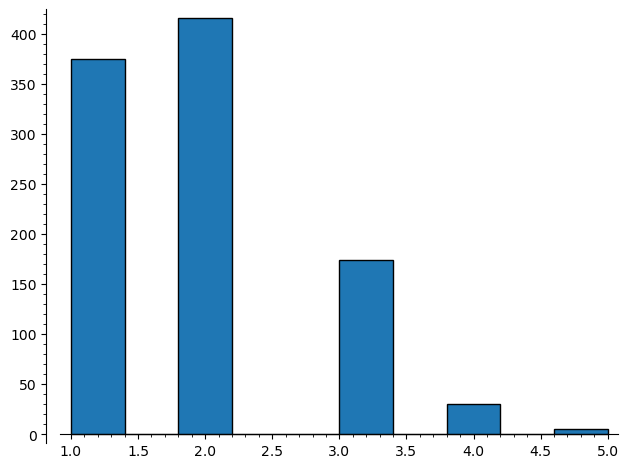

In [107]:
histogram(L).show()

In [106]:
exp_size(L).n()

1.87400000000000

In [83]:
F.cycle_type()

[8, 8, 4, 4]

In [84]:
F.cycle_tuples()

[(1, 20, 11, 16, 24, 5, 14, 9),
 (2, 13, 23, 12),
 (3, 7, 22, 18),
 (4, 19, 17, 10, 21, 6, 8, 15)]

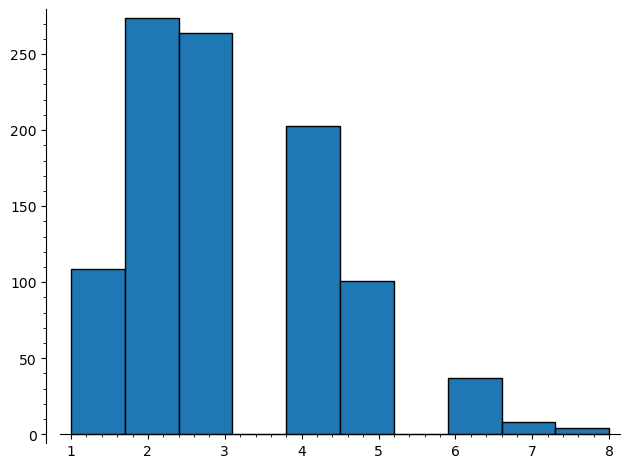

3.07600000000000

In [115]:
G3 = graphs.RandomRegular(3,100)

LG3 = sample_number_of_twisted_faces(G3, samples=1000)

histogram(LG3).show()
exp_size(LG3).n()

In [196]:
G = graphs.CompleteGraph(40)

In [110]:
L = sample_number_of_twisted_faces(G, samples=1000)

In [111]:
exp_size(L).n()

3.85300000000000

In [112]:
G2 = graphs.CompleteGraph(80)

In [113]:
L2 = sample_number_of_twisted_faces(G2, samples=1000)

In [114]:
exp_size(L2).n()

4.55200000000000

In [115]:
4.552-3.853

0.698999999999999

In [116]:
log(2.)

0.693147180559945

In [117]:
log(80.)

4.38202663467388

In [118]:
log(40.)

3.68887945411394

In [119]:
G3 = graphs.CompleteGraph(120)

In [120]:
L3 = sample_number_of_twisted_faces(G3, samples=1000)

In [121]:
exp_size(L3).n()

4.93600000000000

In [122]:
log(120.)

4.78749174278205

In [124]:
type(L3[1])

<class 'sage.rings.rational.Rational'>

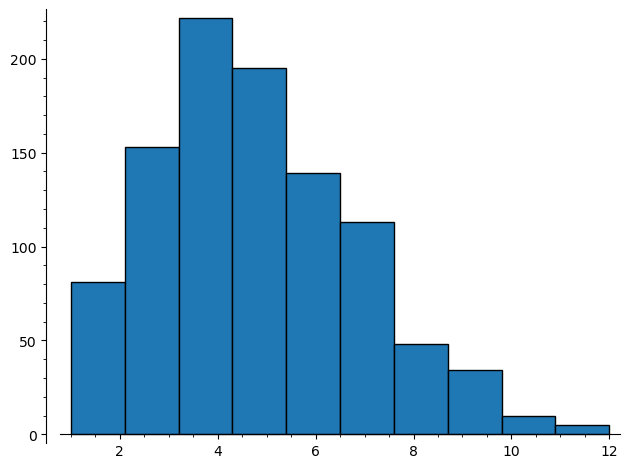

In [125]:
histogram(L3)

In [127]:
np.mean(L3)

4.936

In [128]:
np.var(L3)

3.721904

In [129]:
np.std(L3)

1.9292236780632772

To be added: counting number of bad edges in a random embedding of a snark, say. Compare orientable vs. nonorientable embedding. 

In [172]:
L = sample_number_of_bad_edges(K4, samples=1000)

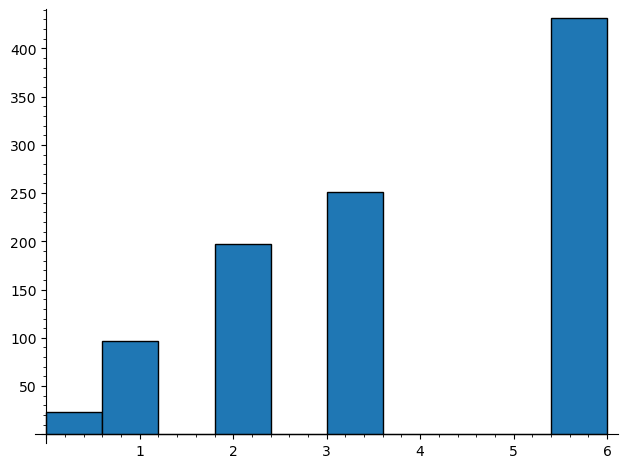

In [173]:
histogram(L)

In [174]:
Pt = graphs.PetersenGraph()

In [176]:
bad_Pt = sample_number_of_bad_edges(Pt, samples=1000)

In [207]:
obad_Pt = sample_number_of_bad_edges(Pt, do_twist=False, samples=1000)

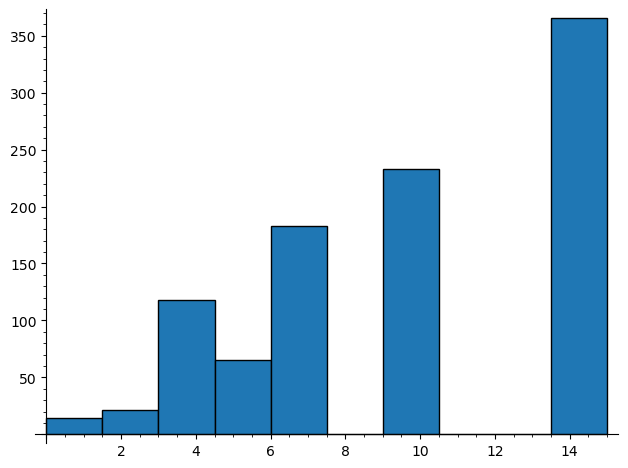

In [177]:
histogram(bad_Pt)

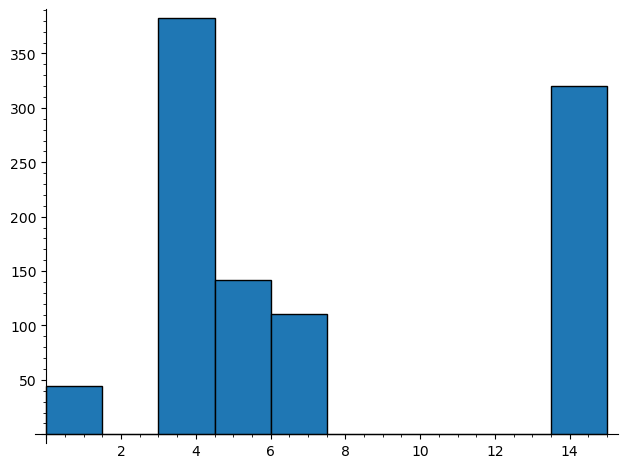

In [209]:
histogram(obad_Pt)

In [187]:
np.mean(bad_Pt)/Pt.num_verts()

0.9675

In [211]:
np.mean(obad_Pt)/Pt.num_verts()

0.7432000000000001

In [210]:
bad_Pt.count(0), obad_Pt.count(0)

(1, 44)

In [183]:
F = graphs.FlowerSnark()

In [184]:
bad_F = sample_number_of_bad_edges(F, samples=1000)

In [212]:
obad_F = sample_number_of_bad_edges(F, do_twist=False, samples=1000)

In [186]:
np.mean(bad_F)/F.num_verts()

1.00375

In [213]:
np.mean(obad_F)/F.num_verts()

0.71755

In [215]:
G = graphs.RandomRegular(3,50)

In [221]:
bad_G = sample_number_of_bad_edges(G, samples=10000)

In [222]:
obad_G = sample_number_of_bad_edges(G, do_twist=False, samples=10000)

In [223]:
np.mean(bad_G)/50

1.000794

In [224]:
np.mean(obad_G)/50

0.742448

In [226]:
min(bad_G), min(obad_G)

(9, 5)

In [225]:
bad_G.count(0), obad_G.count(0)

(0, 0)

In [205]:
TU = sample_number_of_twisted_faces(G,samples=100)

In [203]:
TO = sample_number_of_twisted_faces(G,do_twist=False,samples=100)

In [208]:
np.mean(TU), np.mean(TO)

(3.94, 6.22)

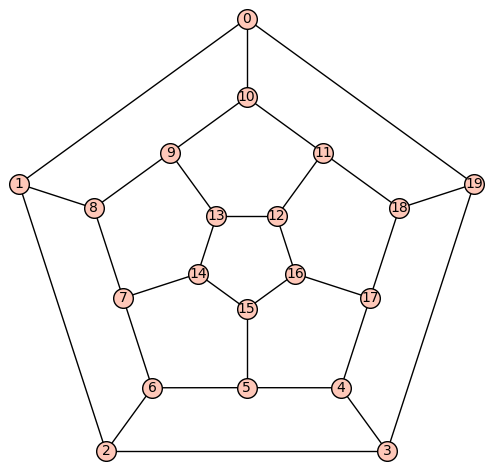

In [228]:
D = graphs.DodecahedralGraph(); D.plot()

In [245]:
bad_D = sample_number_of_bad_edges(D, samples=10000)

In [246]:
obad_D = sample_number_of_bad_edges(D, do_twist=False, samples=10000)

In [247]:
bad_D.count(0), obad_D.count(0)

(1, 4)

In [248]:
np.mean(bad_D)/20, np.mean(obad_D)/20

(0.987195, 0.70848)

In [7]:
B1 = graphs.BlanusaFirstSnarkGraph()
B2 = graphs.BlanusaSecondSnarkGraph()

In [9]:
bad_B1 = sample_number_of_bad_edges(B1, samples=1000)

In [10]:
bad_B2 = sample_number_of_bad_edges(B2, samples=1000)

In [14]:
np.mean(bad_B1)/B1.num_verts()

0.9959444444444444

In [18]:
np.mean(obad_B1)/B1.num_verts()

0.7202222222222222

In [15]:
np.mean(bad_B2)/B2.num_verts()

1.0005

In [19]:
np.mean(obad_B2)/B2.num_verts()

0.7396666666666667

In [16]:
obad_B1 = sample_number_of_bad_edges(B1, do_twist=False, samples=1000)

In [17]:
obad_B2 = sample_number_of_bad_edges(B2, do_twist=False, samples=1000)

In [28]:
K4 = graphs.CompleteGraph(4)

In [40]:
bad_K4 = sample_number_of_bad_edges(K4, samples=100000)

In [41]:
np.mean(bad_K4)/4

0.962275

In [42]:
bad_K33 = sample_number_of_bad_edges(K33, samples=1000)

In [43]:
np.mean(bad_K33)/6

0.9605

In [53]:
C = graphs.CycleGraph(19)

In [45]:
K2 = graphs.CompleteGraph(2)

In [54]:
H = C.cartesian_product(K2)

In [59]:
bad_H = sample_number_of_bad_edges(H, samples=1000)

In [60]:
np.mean(bad_H)/H.num_verts()

0.9837631578947369

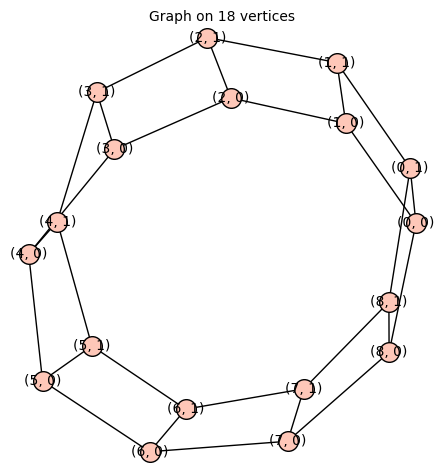